In [37]:
import pandas as pd
import numpy as np
import plotly
import chart_studio.plotly as py
import chart_studio
import matplotlib.pyplot as plt

chart_studio.tools.set_credentials_file(username='oystein.nerva', api_key='0ODcZ6UisJ8n0AjEQt9N')

In [111]:
url = "https://github.com/NRVA/COVID19_Norge/raw/master/COVID19_fhi_data_fylke.csv"
data = pd.read_csv(url, sep=';')
data

,Fylke,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19
0,Agder,20,32,34,52,55,67,67,67,75
1,Innlandet,23,40,49,57,72,81,88,97,105
2,Møre og Romsdal,7,6,7,16,20,20,20,20,25
3,Nordland,3,4,5,8,8,11,11,12,13
4,Oslo,123,166,207,222,281,292,329,348,392
5,Rogaland,71,82,105,119,127,131,150,161,176
6,Troms og Finnmark,7,11,12,16,20,21,24,28,28
7,Trøndelag,25,37,43,46,50,52,61,70,75
8,Vestfold og Telemark,15,22,30,39,48,53,59,63,65
9,Vestland,41,67,78,101,118,127,141,147,153


In [106]:
df = data.melt(id_vars=['Fylke']).copy()
df['variable'] = pd.to_datetime(df['variable'], errors='coerce')
df = df.groupby(["Fylke", pd.Grouper(key="variable", freq="d")]).max().reset_index()
df = df.pivot(index="variable", columns="Fylke", values="value")
df.head()

Fylke,Agder,Innlandet,Møre og Romsdal,Nordland,Oslo,Rogaland,Troms og Finnmark,Trøndelag,Vestfold og Telemark,Vestland,Viken
variable,,,,,,,,,,,
2020-03-11,20,23,7,3,123,71,7,25,15,41,124
2020-03-12,32,40,6,4,166,82,11,37,22,67,154
2020-03-13,34,49,7,5,207,105,12,43,30,78,180
2020-03-14,52,57,16,8,222,119,16,46,39,101,231
2020-03-15,55,72,20,8,281,127,20,50,48,118,278


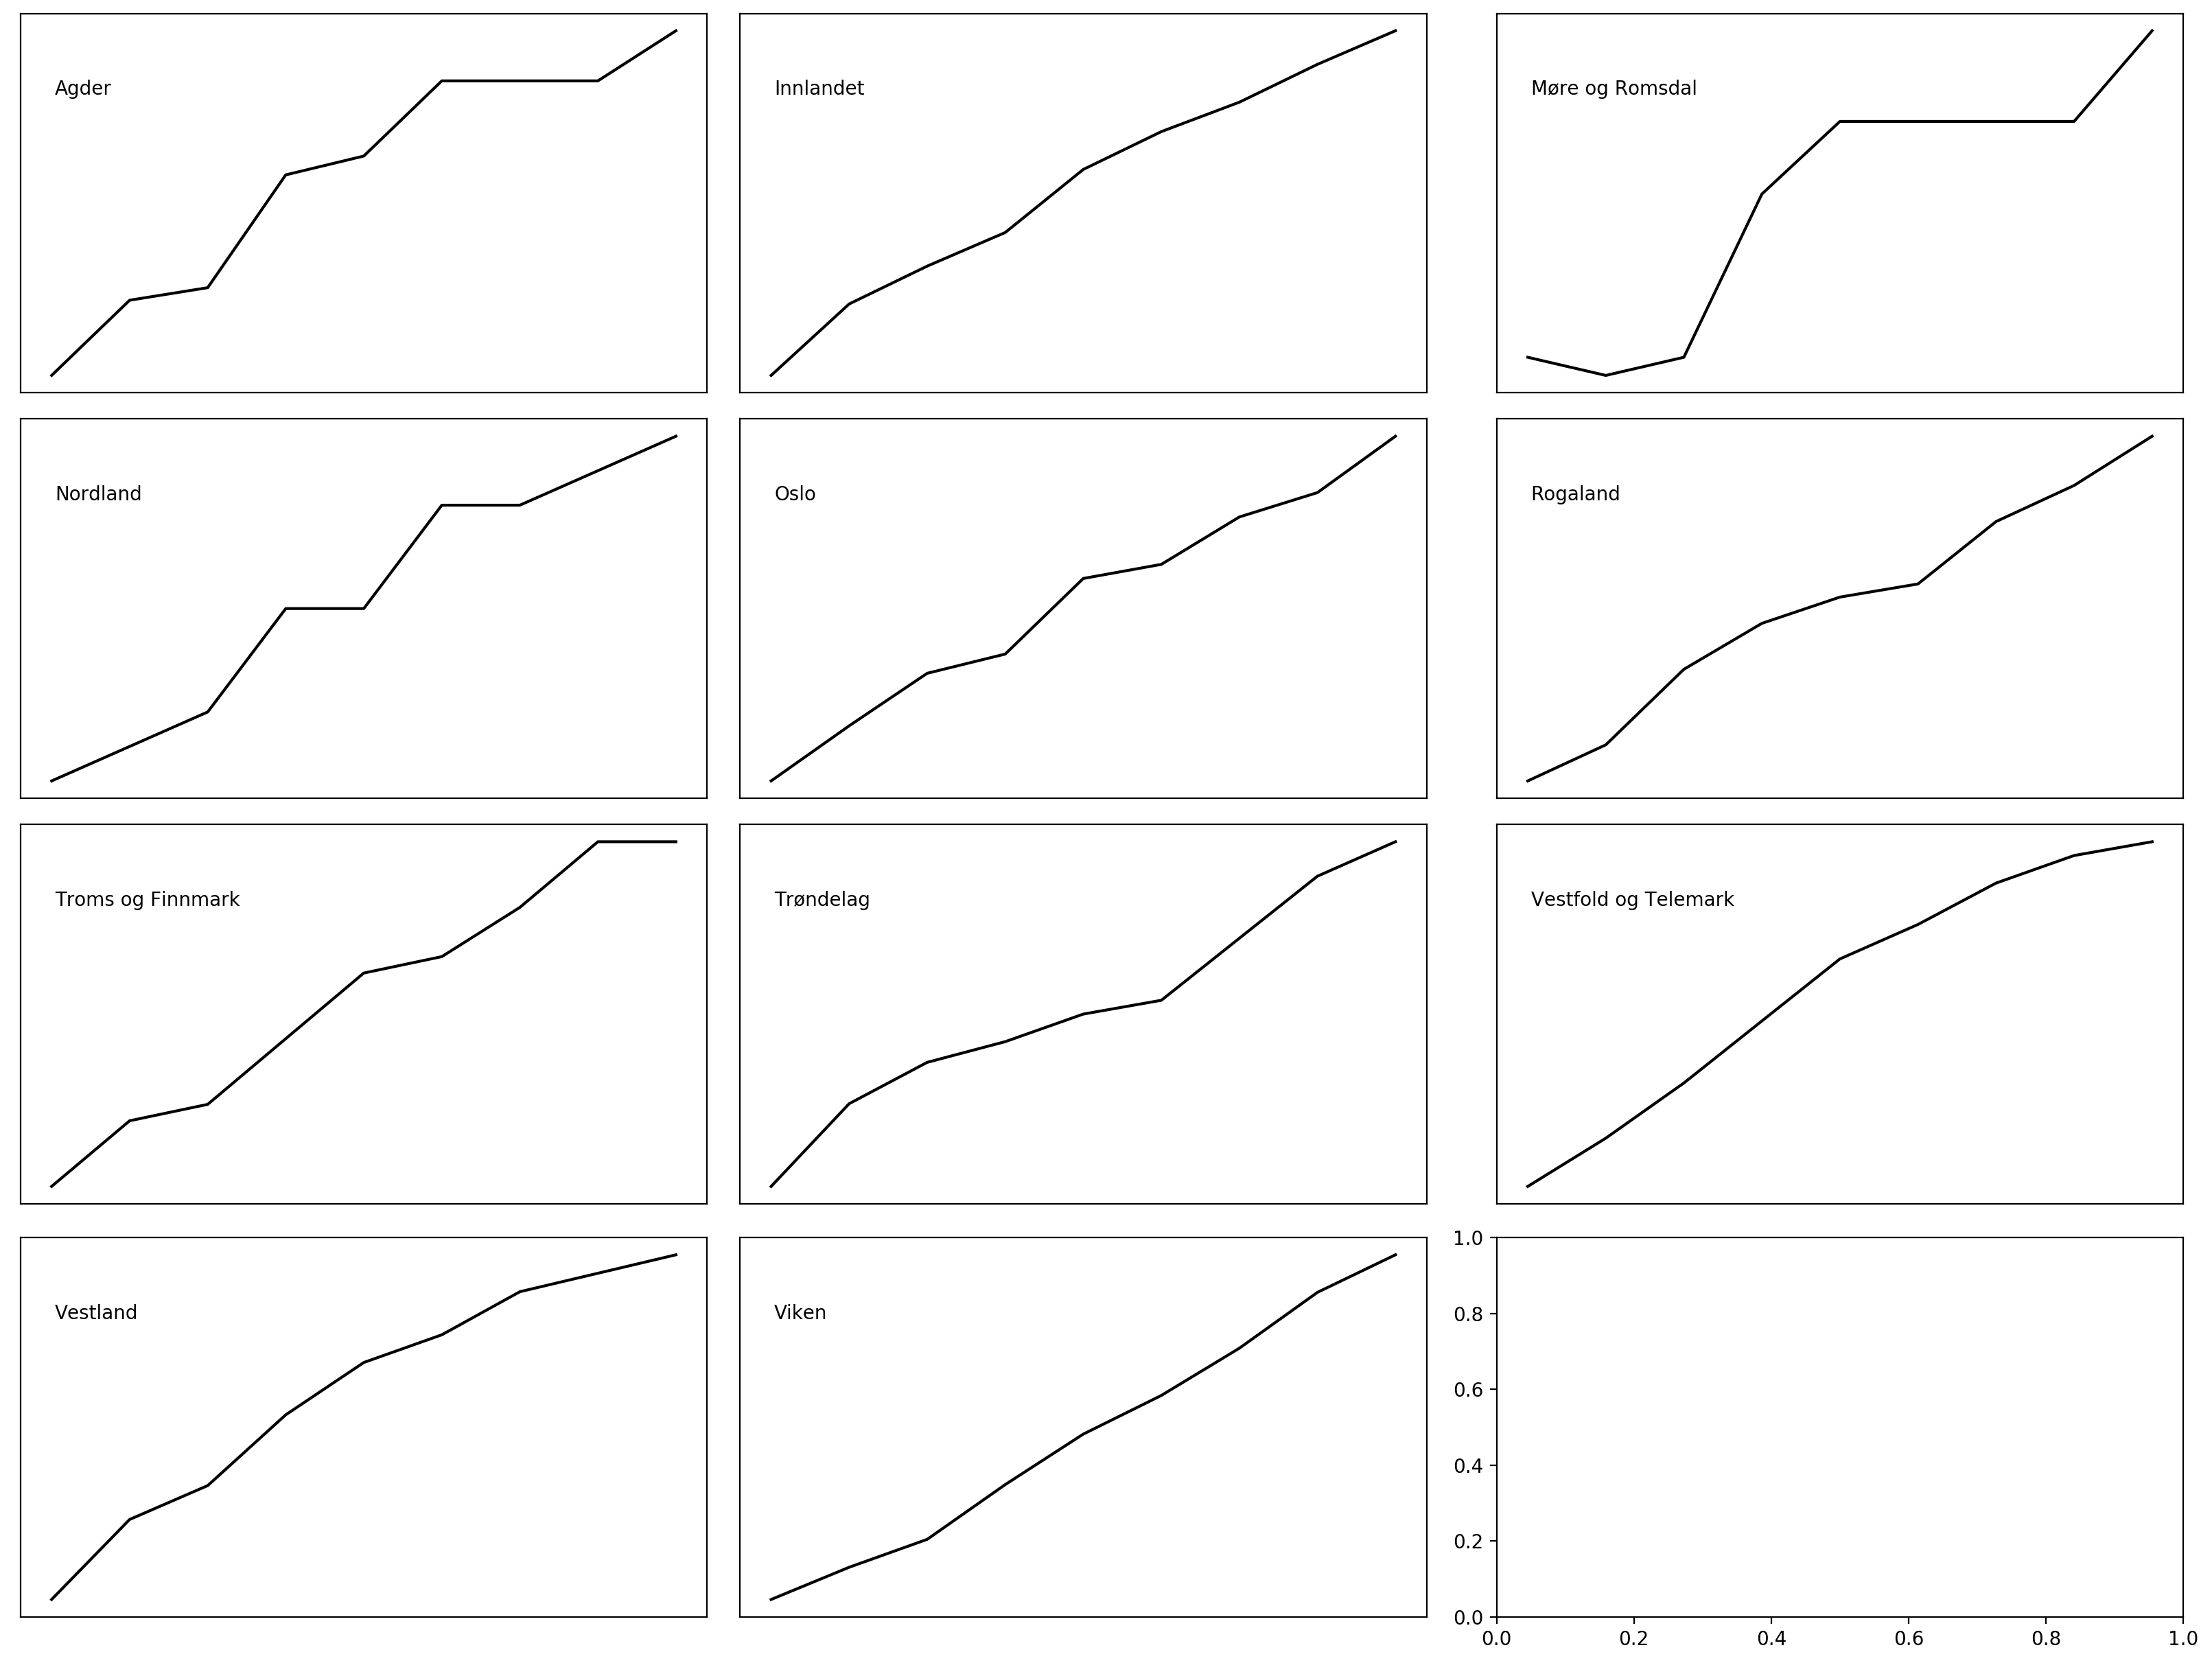

In [107]:
fig = plt.figure(figsize=(16,12), dpi=200, constrained_layout=True)

axs = fig.subplots(nrows=4, ncols=3)

for i in range(len(df.columns)):
    axs.flat[i].plot(df.index, df.iloc[:,i], color='black')
    axs.flat[i].get_xaxis().set_ticks([])
    axs.flat[i].get_yaxis().set_ticks([])
    axs.flat[i].annotate(df.iloc[:,i].name, (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')
    
fig.savefig('fylker_matrix.png')

In [108]:
df = df.unstack().reset_index()

df = df[pd.to_datetime(df["variable"]) >= pd.to_datetime("2020-02-25")]

df.head()

,Fylke,variable,0
0,Agder,2020-03-11,20
1,Agder,2020-03-12,32
2,Agder,2020-03-13,34
3,Agder,2020-03-14,52
4,Agder,2020-03-15,55


In [109]:
import plotly.express as px
fig = px.scatter(df, x="variable", y=0, color="Fylke")
fig.update_traces(mode="markers+lines")


# vekstkurver

In [ ]:
RegionList = df[df['Cluster'] == 9]['Region']